#Model to predict Minutes played (MP) for players in the NBA.

##About the dataset:
The dataset contains NBA players stats from 1998 - 2022.

##Objective:
Build a model to predict how many minutes an NBA player will play per game during any given season (The target column to predict is mp)

##We are going to perform the following steps:
1. Read the file and display the description of the df.
2. Handle missing values
3. Feature engineering
4. Explore the data
5. Try different model types
  - **RMSE** as accuracy measure for continuous predictive models
  - **Accuracy Score** for categorical predictive models
  -**Silhouette Score** for models involving clustering


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Importing the dataframe

In [ ]:
data = pd.read_csv("/content/NBA_Player_Stats_2.csv")
data.describe()

,Rk,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
count,14573.000000,14573.000000,14573.000000,14573.000000,14573.000000,14573.000000,14573.000000,14485.000000,14573.000000,14573.000000,...,13824.000000,14573.000000,14573.000000,14573.000000,14573.000000,14573.000000,14573.000000,14573.000000,14573.000000,14573.000000
mean,244.332876,26.705483,45.544500,21.565429,19.623626,2.932046,6.598586,0.432377,0.590894,1.703637,...,0.726241,0.909984,2.522013,3.429953,1.758114,0.621540,0.390167,1.132368,1.781740,7.853057
std,139.596859,4.252495,26.110389,27.035594,9.957188,2.133970,4.541544,0.104592,0.698191,1.840081,...,0.152562,0.804527,1.766841,2.433847,1.761888,0.439759,0.460479,0.787383,0.826657,5.840447
min,1.000000,18.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,124.000000,23.000000,22.000000,0.000000,11.400000,1.300000,3.100000,0.393000,0.000000,0.100000,...,0.660000,0.300000,1.300000,1.700000,0.500000,0.300000,0.100000,0.600000,1.200000,3.400000
50%,243.000000,26.000000,48.000000,7.000000,18.900000,2.400000,5.500000,0.435000,0.300000,1.100000,...,0.750000,0.700000,2.200000,2.900000,1.200000,0.500000,0.200000,1.000000,1.800000,6.400000
75%,361.000000,30.000000,70.000000,39.000000,27.700000,4.100000,9.200000,0.479000,1.000000,2.800000,...,0.822000,1.300000,3.300000,4.600000,2.300000,0.900000,0.500000,1.500000,2.400000,11.100000
max,605.000000,44.000000,85.000000,83.000000,43.700000,12.200000,27.800000,1.000000,5.300000,13.200000,...,1.000000,6.800000,12.000000,18.000000,12.800000,3.000000,6.000000,5.700000,6.000000,36.100000


#Data Attributes:


*   Pos: position that the player holds
*   Age: Players age
* Tm: Team the player is part of
*G: total games played
*GS	: games where they started
*MP	: minutes played per game
*FG	: field goals per game
*FGA	: field goal attempts per game
*FG%	: Field goal percentage
*3P	: 3-point field goals per game
*3PA: 3-point field goals attempts per game
*3P%:	3-point field goal percentage
*2P	: 2-point field goals per game
*2PA	: 2-point field goals attempts per game
*2P%	: 	3-point field goal percentage
*eFG%	: Effective field goal percentage
*FT	: free throws per game
*FTA	: free throws attempts per game
*FT%	: free throws percentage
*ORB	: offensive rebounds per game
*DRB	:  Defensive Rebounds per game
*TRB	: Total Rebounds per game
*AST	: Assists per game
*STL	: Steals per game
*BLK	: Blocks per game
*TOV	: Turnovers per game
*PF	: Personal Fouls per game
*PTS : Points per game







# Feature Engineering

We began by trying to replace NaN values with a KNN algorithm, however, it requires scaled data, which modifies most of the values extremely heavily which is not desirable for our dataset, especially considering the importance of keeping the values in the original scale for predictions. Therefore, we decided it is not a good approach.


In [ ]:
NBA_players_numeric = data.select_dtypes(include='number')

scaler = MinMaxScaler()
scaledData = pd.DataFrame(scaler.fit_transform(NBA_players_numeric), columns = NBA_players_numeric.columns)

nanImputer = KNNImputer(n_neighbors=5)

NBA_players_numeric = pd.DataFrame(nanImputer.fit_transform(scaledData), columns=scaledData.columns)

NBA_players_numeric.head()

,Rk,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,0.000000,0.384615,0.357143,0.000000,0.391304,0.270492,0.316547,0.377,0.037736,0.075758,...,1.000,0.029412,0.083333,0.066667,0.148438,0.166667,0.000000,0.105263,0.166667,0.202216
1,0.001656,0.192308,0.690476,0.192771,0.372998,0.196721,0.219424,0.403,0.018868,0.022727,...,0.672,0.102941,0.100000,0.111111,0.070312,0.200000,0.033333,0.192982,0.233333,0.177285
2,0.003311,0.115385,0.964286,0.987952,0.823799,0.655738,0.589928,0.485,0.056604,0.045455,...,0.784,0.411765,0.358333,0.394444,0.203125,0.366667,0.150000,0.543860,0.416667,0.617729
3,0.004967,0.230769,0.702381,0.265060,0.494279,0.237705,0.241007,0.428,0.207547,0.219697,...,0.784,0.044118,0.183333,0.133333,0.273438,0.400000,0.033333,0.333333,0.266667,0.224377
4,0.004967,0.230769,0.428571,0.036145,0.308924,0.131148,0.140288,0.414,0.094340,0.128788,...,0.676,0.029412,0.091667,0.072222,0.148438,0.233333,0.016667,0.228070,0.233333,0.124654


Instead of KNN to replace blanks, we decided that dropping NaNs would be more useful due to the scaling of the data not occuring.


In [ ]:
#Getting rid of NA entries for simplicity of program
print("Number of rows before removing NA: " + str(data.shape) + "\n")
NBA_players_df = data.dropna().copy()
print("Shape of dataframe after removing NA: " + str(NBA_players_df.shape) + "\n")

Number of rows before removing NA: (14573, 32)

Shape of dataframe after removing NA: (11962, 32)



2 new changes are made in the code below:
- 'Injured' column: Tells us whether the NBA player was injured in that season, so we know whether to use that season to calculate PER (Explained in next cell)

- As NBA players' playing time often varies by the position they play, one-hot encoding the positions they play would be necessary.

In [ ]:
#Creating the Injured feature
NBA_players_df['Injured'] = NBA_players_df['MP'] == 0

NBA_players_df['Pos'] = NBA_players_df['Pos'].apply(lambda x: x.split('-')[0])
NBA_players_df = pd.get_dummies(NBA_players_df, columns=['Pos'])

#Showing the new column titles with each position as a separate column
print("Updated columns:")
NBA_players_df.columns

Updated columns:


Index(['Rk', 'Player', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P',
       '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB',
       'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'Season', 'MVP',
       'Injured', 'Pos_C', 'Pos_PF', 'Pos_PG', 'Pos_SF', 'Pos_SG'],
      dtype='object')

Below we are feature engineering **Player Efficiency Rating** (PER), which is a statistic that quantifies individual performance statistics into a normalized value that can rank NBA players according to their overall efficiency regardless of position. This a one size fits all statistic that is commonly used for the NBA.

In [ ]:
for K in np.arange(1, 100, 0.1):
    #Calculate PER using the current value of K
    NBA_players_df['PER'] = (
        (NBA_players_df['PTS'] + NBA_players_df['TRB'] + NBA_players_df['AST'] +
         NBA_players_df['STL'] + NBA_players_df['BLK']) -
        (NBA_players_df['FGA'] - NBA_players_df['FG'] + NBA_players_df['FTA'] - NBA_players_df['FT'] +
         NBA_players_df['TOV'])
    ) * (K)
    #Calculate the league average PER
    league_avg_PER = NBA_players_df[NBA_players_df['Injured']==False]['PER'].mean()
    #Check if the league average is close to the target
    if league_avg_PER > 15 and league_avg_PER < 16:
      print("Average PER: " + str(league_avg_PER))
      break
NBA_players_df.head()

Average PER: 15.411349272696878


,Rk,Player,Age,Tm,G,GS,MP,FG,FGA,FG%,...,PTS,Season,MVP,Injured,Pos_C,Pos_PF,Pos_PG,Pos_SF,Pos_SG,PER
0,1,Mahmoud Abdul-Rauf,28,SAC,31,0,17.1,3.3,8.8,0.377,...,7.3,1997-98,False,False,0,0,1,0,0,7.68
1,2,Tariq Abdul-Wahad,23,SAC,59,16,16.3,2.4,6.1,0.403,...,6.4,1997-98,False,False,0,0,0,0,1,7.36
2,3,Shareef Abdur-Rahim,21,VAN,82,82,36.0,8.0,16.4,0.485,...,22.3,1997-98,False,False,0,0,0,1,0,33.28
3,4,Cory Alexander,24,TOT,60,22,21.6,2.9,6.7,0.428,...,8.1,1997-98,False,False,0,0,1,0,0,14.88
4,4,Cory Alexander,24,SAS,37,3,13.5,1.6,3.9,0.414,...,4.5,1997-98,False,False,0,0,1,0,0,7.36


# Data Exploration

Here is a distribution of the PER values we calculated per position
:

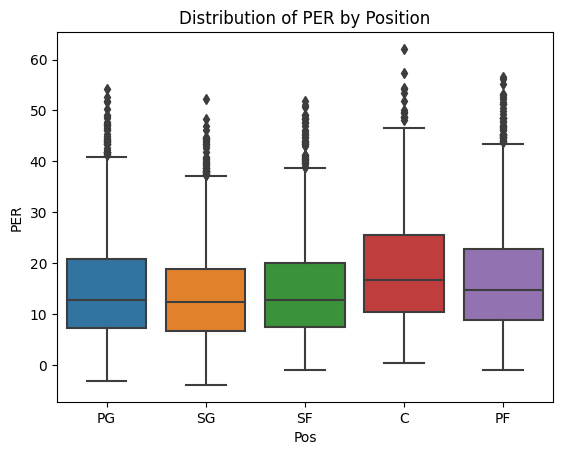

In [ ]:
NBA_players_df['Pos'] = data['Pos'].apply(lambda x: x.split('-')[0])
sns.boxplot(x='Pos', y='PER', data = NBA_players_df)
plt.title("Distribution of PER by Position")
plt.show()

This distribution is accurate and logical, as the taller positions (C, PF) will be the most efficient due to shot selection, while the front-court will be less efficient due to other reasons, such as ball-handling, shot creation, etc.


Now we will show the **correlation values** between the predictive features in the dataset and Minutes Played:

<ipython-input-95-9682dcfa7d37>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = NBA_players_df.corr()


Text(0.5, 1.0, 'Correlation Matrix for Selected Y-axis Labels')

<Figure size 2500x1000 with 0 Axes>

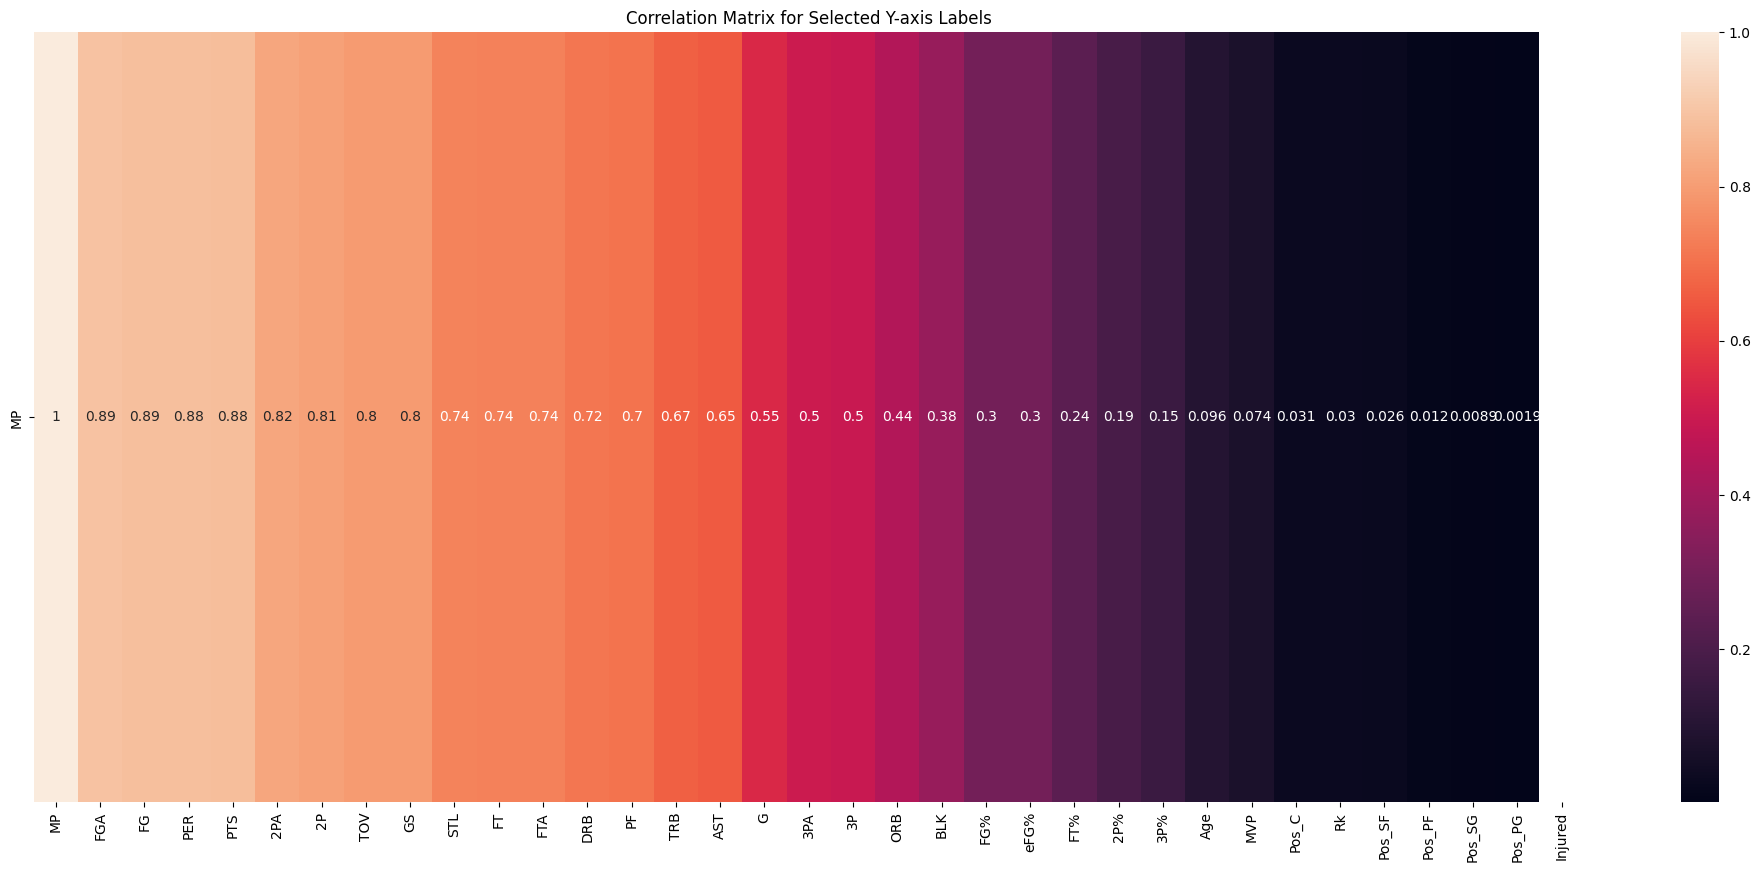

In [ ]:
corr_matrix = NBA_players_df.corr()
plt.figure(figsize=(25,10), facecolor='w')
matrix_y = ['MP']

minutes_df = corr_matrix.loc[matrix_y, :]

sorted_corr_matrix = minutes_df.abs().sort_values(by=matrix_y, axis=0, ascending=False)
sorted_corr_matrix = sorted_corr_matrix.sort_values(by=matrix_y, axis=1, ascending=False)

#Use heatmap to display correlation of variables with Minutes Played
plt.figure(figsize=(25, 10), facecolor='w')
sns.heatmap(sorted_corr_matrix, xticklabels=sorted_corr_matrix.columns, yticklabels=sorted_corr_matrix.index, annot=True)
plt.title("Correlation Matrix for Selected Y-axis Labels")

In this figure, we can see that Field Goals Attempted/Field Goals (Made) have the highest correlation with Minutes Played, which is reasonable considering those who shoot the most often play the most and control the pace of the game. Right behind them, as expected, is PER, as efficiency has historically shown the most impact in regards to changing minutes. Next in ranked correlation is Points, which is similar to Field Goals, but is dependent on shot choice as well as Free Throws.

# Supervised Learning Method 1: Regression Trees
We chose to do this learning algorithm as it has the most practicality given the number of features and numeric values being predicted in minutes.

In [ ]:
X = NBA_players_df[['PER', 'Age', 'G', 'GS', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'Pos_C', 'Pos_PF', 'Pos_PG', 'Pos_SG', 'Pos_SF']]
y = NBA_players_df['MP']

#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Fit training/testing data to Decision Tree Model
regressor = DecisionTreeRegressor(random_state=42)
regressor.fit(X_train, y_train)
#Predict minutes played according to training data
y_pred = regressor.predict(X_test)
#Calculate accuracy as Root Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
print(f'Root Mean Squared Error: {rmse}')

Root Mean Squared Error: 3.1435278996157088


The RMSE value of 3.14 is not bad, but when the most minutes an NBA player can play is 48, we can hope for it to be lower.

# Method 2: Naive Bayes
The next supervised learning method we will perform below, as it is a non-linear regression that may deem more accurate to the data.

In [ ]:
#Transforming the feature "MP" (Minutes Played) into a categorical variable by binning
minute_bins = []
labels = []
prev = 0
for i in range(49):
  minute_bins.append(i)
  #Labels have to be 1 size smaller than the bins, so we add a range for each minute instead
  if i != 0:
    labels.append(str(i-1) + "-" + str(i))
#print(labels)
NBA_players_df['MP_categorical'] = pd.cut(NBA_players_df['MP'], bins = minute_bins, labels = labels)
#Since we changed MP to categorical, update the Y
y = NBA_players_df['MP_categorical']
#Split the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)

#Fit the Naive Bayes Model, Gaussian classifier
classifier = GaussianNB()
classifier.fit(X_train, y_train)
#Predict according to the classifier
predictions = classifier.predict(X_test)

#Evaluate the model using accuracy
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy}')

Accuracy: 0.13873798579189303


As shown by the accuracy measure, Naive Bayes isn't a great form of supervised learning for this dataset problem, as our data cannot be scaled and categorical binning does not provide the best accuracy or account for error in regards to continuous data.

# Method 3: Neural Networks

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import StandardScaler


#Building the Neural Network
model = Sequential()
model.add(Dense(64, input_dim=X.shape[1], activation='relu'))  # First hidden layer
model.add(Dense(32, activation='relu'))  # Second hidden layer
model.add(Dense(1))  # Output layer

#Compiling the Model
model.compile(loss='mean_squared_error', optimizer='adam')

X = NBA_players_df[['PER', 'Age', 'G', 'GS', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'Pos_C', 'Pos_PF', 'Pos_PG', 'Pos_SG', 'Pos_SF']]
y = NBA_players_df['MP']

#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Training the Model
model.fit(X_train, y_train, epochs=100, batch_size=10, verbose=0)

print("Number of layers: " + str(len(model.layers)))
#Evaluating the Model
mse = model.evaluate(X_test, y_test, verbose=0)
rmse = mse ** 0.5
print(f'Root Mean Squared Error: {rmse}')


Number of layers: 3
Root Mean Squared Error: 2.0424492432580545


Neural Nets had a lower RMSE than Regression Trees by more than 35%. The model also used 3 layers.

# Method 4: Gradient-Boosting Ensembling

In [ ]:
import lightgbm as lgb

#Initialize the LightGBM Regressor
lgb_regressor = lgb.LGBMRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

#Fit the model
lgb_regressor.fit(X_train, y_train)

#Predict on the test set
y_pred_lgb = lgb_regressor.predict(X_test)

#Calculate RMSE
rmse_lgb = mean_squared_error(y_test, y_pred_lgb, squared=False)
print(f'Root Mean Squared Error: {rmse_lgb}')

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004119 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3361
[LightGBM] [Info] Number of data points in the train set: 9569, number of used features: 30
[LightGBM] [Info] Start training from score 21.406458
LightGBM RMSE: 2.000207722214388


Here we see the lowest RMSE yet, and this pattern continues with the next Ensembling method as well, which makes sense since it utilizes the weak learners' predictions and assesses the relationship between less significant determinants and minutes played.

# Method 5: Stacking Ensembling

In [ ]:
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error



#Initialize and train the Gradient Boosting Regressor
gb_regressor = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_regressor.fit(X_train, y_train)

#Initialize and train the Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

#Initialize and train the XGBoost Regressor
xgb_regressor = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
xgb_regressor.fit(X_train, y_train)


#Define models to ensemble
voting_regressor = VotingRegressor(
    estimators=[('gb', gb_regressor), ('rf', rf_regressor), ('xgb', xgb_regressor)]
)

#Fit and predict using the Voting Regressor
voting_regressor.fit(X_train, y_train)
y_pred_vote = voting_regressor.predict(X_test)

#Calculate RMSE
rmse_vote = mean_squared_error(y_test, y_pred_vote, squared=False)
print(f'RMSE: {rmse_vote}')


Voting Regressor RMSE: 2.0731513828308996


Like the previous ensembling method, the RMSE for stacking is also close to 2. Although we cannot pinpoint as to why it might be worse than Gradient-Boosting, we know that Gradient-Boosting emphasizes importance of features that may not be as effective in predicting, while Stacking doesn't necessarily do that.

# Method 6: Multi-Class Partitioning Ensembling (Clustering)

In [ ]:
# Ensemble of Clustering Algorithms
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
import pandas as pd
import numpy as np

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Applying different clustering algorithms
# K-Means Clustering
kmeans = KMeans(n_clusters=5, n_init=10, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

# Hierarchical Clustering
hierarchical = AgglomerativeClustering(n_clusters=5)
hierarchical_labels = hierarchical.fit_predict(X_scaled)

# DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)

# Combining the clusters
cluster_labels = pd.DataFrame({
    'KMeans': kmeans_labels,
    'Hierarchical': hierarchical_labels,
    'DBSCAN': dbscan_labels
})
ensemble_labels = cluster_labels.mode(axis=1)[0].astype(int)

# Evaluation with Silhouette Score (if no true labels are available)
silhouette_avg = silhouette_score(X_scaled, ensemble_labels)
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: -0.0661833203111731


Based on the Silhouette Score of approximately -0.066 for our ensemble of clustering algorithms, it appears that the current clustering approach may not be effectively distinguishing between different groups within the NBA players dataset. This score, which ranges from -1 to +1, indicates a degree of overlap among the clusters or possibly that the data points are not fitting well within their assigned clusters.

# Conclusion

After exploring the data, feature engineering, and trying different models we found that Gradient-boosting ensembling provided the highest accuracy of all the models that we trained. We used RMSE as the benchmark when comparing our models. This ensembling method outperformed other models because of how it leverages weak learners which sequents corrects errors from previous models, as well as its ability to assess relationships between smaller determinants. The RMSE for this was **2.000207722214388** which is very good since we are trying to estimate how many minutes out of 48 a player can play.
